**This notebook will analyze data from a study on toddle sleep habits.**

In [8]:
#Imports...
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 30) # set so can see all columns of the DataFrame

In [2]:
# Import the data
df = pd.read_csv("nap_no_nap.csv") 
df.head()

,id,sex,age (months),dlmo time,days napped,napping,nap lights outl time,nap sleep onset,nap midsleep,nap sleep offset,nap wake time,nap duration,nap time in bed,night bedtime,night sleep onset,sleep onset latency,night midsleep time,night wake time,night sleep duration,night time in bed,24 h sleep duration,bedtime phase difference,sleep onset phase difference,midsleep phase difference,wake time phase difference
0,1,female,33.7,19.24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.45,20.68,0.23,1.92,7.17,629.4,643.0,629.4,-1.21,-1.44,6.68,11.93
1,2,female,31.5,18.27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.23,19.48,0.25,1.09,6.69,672.4,700.4,672.4,-0.96,-1.21,6.82,12.42
2,3,male,31.9,19.14,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.60,20.05,0.45,1.29,6.53,628.8,682.6,628.8,-0.46,-0.91,6.15,11.39
3,4,female,31.6,19.69,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.46,19.50,0.05,1.89,8.28,766.6,784.0,766.6,0.23,0.19,6.20,12.59
4,5,female,33.0,19.52,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.21,19.65,0.45,1.30,6.95,678.0,718.0,678.0,0.31,-0.13,5.78,11.43


### My Goal:
* Examine the differences in a night bedtime between napping and non-napping toddlers
* The dataset includes more number of sleep varibles but we are focusing on the idea of hypothesis testing. 

## Hypothesis tests
We will look at two hypothesis test, each with $\alpha = .05$:  


1. Is the average bedtime for toddlers who nap later than the average bedtime for toddlers who don't nap?


$$H_0: \mu_{nap}=\mu_{no\ nap}, \ H_a:\mu_{nap}>\mu_{no\ nap}$$
Or equivalently:
$$H_0: \mu_{nap}-\mu_{no\ nap}=0, \ H_a:\mu_{nap}-\mu_{no\ nap}>0$$


2. The average 24 h sleep duration (in minutes) for napping toddlers is different from toddlers who don't nap.


$$H_0: \mu_{nap}=\mu_{no\ nap}, \ H_a:\mu_{nap}\neq\mu_{no\ nap}$$
Or equivalently:
$$H_0: \mu_{nap}-\mu_{no\ nap}=0, \ H_a:\mu_{nap}-\mu_{no\ nap} \neq 0$$

In [4]:
#Create Dataframes from the main one...
napping = df.query('napping == 1')['night bedtime']
non_napping = df.query('napping == 0')['night bedtime']

In [5]:
ntotal = df.shape[0]
n1 = napping.shape[0]
n2 = non_napping.shape[0]

In [6]:
print(ntotal, n1, n2)

20 15 5


The number of total toddlers **20**. **15** of them are napping and the rest non-napping.

In [10]:
#This will perform a two sided ttest
tstats, pvalue = ttest_ind(napping, non_napping, equal_var=True)

In this case we are performing pooled t-test (Assuming the variance of the two populations are equal) which is not true for most situations.

**The Advantages of that pooled t-test:**
1. It is an exact procedure
2. Consistent with other common statistical techniques, like regression and ANOVA.


#### What if we used an unpooled t-test, welch test for example?
1. It will give us an approximated procedure
2. The degree of freedom will be complicated to calcu.
3. It will not be consistent with statistical techniques, like regression and ANOVA.

#### But Don't forget!
1. It does not require assumption of equal population variance.
2. Worked very well in most situations.

In [11]:
#The P-value for the two sided t-test:
print(pvalue)

0.026834082877686037


In [12]:
#for a one-sided t-test:
print(pvalue/2)

0.013417041438843019


In both cases the pvalue is less than 0.05, so we will reject the null hypothesis.

**Conclusion** There is a difference in means of night bedtime between nopping and non-nopping toddlers.

#### Discussion on PDF - CDF - PPF what is the difference?

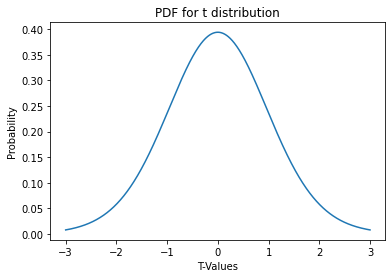

In [24]:
from scipy.stats import t
import matplotlib.pyplot as plt
from shapely.geometry import LineString

#make a t distribution with 20 deg of freedom...
t_dist = t(20)

#plot the PDF
t_values = np.linspace(-3, 3, 1000)

plt.plot(t_values, t_dist.pdf(t_values))
plt.xlabel("T-Values")
plt.ylabel("Probability")
plt.title("PDF for t distribution")
plt.show()

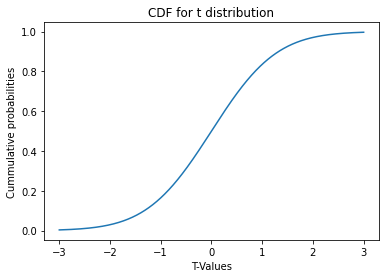

In [25]:
#Plot a CDF
plt.plot(t_values, t_dist.cdf(t_values))
plt.xlabel("T-Values")
plt.ylabel("Cummulative probabilities")
plt.title("CDF for t distribution")
plt.show()

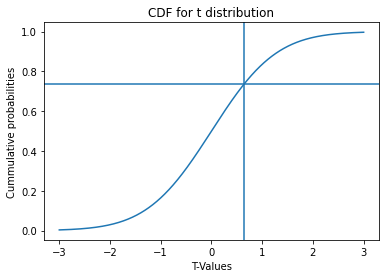

In [34]:
#If you want to get p-value for t_value = 2.64
plt.plot(t_values, t_dist.cdf(t_values))
plt.xlabel("T-Values")
plt.axvline(x = 0.65)
plt.axhline(y=t.cdf(0.65,20))
plt.ylabel("Cummulative probabilities")
plt.title("CDF for t distribution")
plt.show()

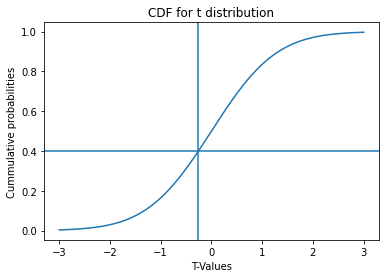

In [35]:
#If you want to get p-value for t_value = 2.64
plt.plot(t_values, t_dist.cdf(t_values))
plt.xlabel("T-Values")
plt.axvline(x = t.ppf(0.4, 20))
plt.axhline(y=0.4)
plt.ylabel("Cummulative probabilities")
plt.title("CDF for t distribution")
plt.show()

#### CDF - PPF

* CDF will give you the value of t value and you will get the cummulative probability
* PPF will give you the value of cummulative probability and you will get the t value